In [ ]:
import pandas as pd
import matplotlib
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['from', 'would', 'could', 'may', 'one', 'I', 'It', 'but', 'also', 'this', 'that', 'they', 'it', 'The', 'But', 'And', 'A', 'We', 'They', 'This', 'That', 'In', 'These', 'even', 'There', 'As', 'If', 'He', 'us', 'For'])
import pandas as pd
import numpy as np
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
Downsizing_df = pd.read_csv("/gdrive/My Drive/Neoliber_2020.csv")

In [ ]:
Downsizing_df

,Unnamed: 0,author,body,date,title,url,year,month,day
0,0.0,Matt Kilcoyne,With the release of the details of the make-up...,2020-05-04,WHITHER THE ECONOMISTS WHILE THE ECONOMY WITHE...,https://www.adamsmith.org/news/whither-the-eco...,2020.0,5.0,4.0
1,1.0,Madsen Pirie,Cost-benefit analysis is a useful tool for wor...,2020-05-10,WE'RE MISSING COST BENEFIT ANALYSIS IN OUR COV...,https://www.adamsmith.org/blog/were-missing-co...,2020.0,5.0,10.0
2,2.0,Dr Smith,I have been asked how medicine is practised di...,2020-04-29,MEDICINE DURING COVID,https://www.adamsmith.org/despatches/medicine-...,2020.0,4.0,29.0
3,3.0,Lance Forman,The Government is going about supporting the e...,2020-03-19,COVID19: HOW TO DEAL WITH BUSINESS COLLAPSE AN...,https://www.adamsmith.org/blog/covid19-how-do-...,2020.0,3.0,19.0
4,4.0,Eamonn Butler,"Too late now, but I think I understand why min...",2020-04-27,WHY THE POLICE GOT IT SO WRONG ON ENFORCING CO...,https://www.adamsmith.org/blog/why-the-police-...,2020.0,4.0,27.0
...,...,...,...,...,...,...,...,...,...
781,405.0,Andrew McIndoe,Our most memorable heroes are forged through c...,2020-05-15,"When People See Nonprofits Persevering, They’l...",https://www.heritage.org/jobs-and-labor/commen...,2020.0,5.0,15.0
782,406.0,Tommy Binion,The news has been full of stories on SCOTUS no...,2020-10-13,The Confirmation of Amy Coney Barrett: Opening...,https://www.heritage.org/political-process/com...,2020.0,10.0,13.0
783,407.0,Kay C. James,When the nongovernmental National Coronavirus ...,2020-04-22,COVID-19 Crisis Has Re-Ignited a Sense of Comm...,https://www.heritage.org/civil-society/comment...,2020.0,4.0,22.0
784,408.0,"Kevin Pham, MD",America’s coronavirus testing rates have emerg...,2020-04-26,COVID-19 Testing and the Way Forward on Resumi...,https://www.heritage.org/public-health/comment...,2020.0,4.0,26.0


In [ ]:
# Σβήνω κάποιες στήλες διότι δεν μου προσδίδουν καμία χρήσιμη πληροφορία 

Downsizing_df = Downsizing_df.drop('Unnamed: 0', axis = 1)

In [ ]:
Downsizing_df = Downsizing_df[Downsizing_df.body.notnull()]

In [ ]:
Downsizing_df.shape

(785, 8)

In [ ]:
Downsizing_df['body'][16]

'The ASI’s latest paper, written by ASI Head of Research Matthew Lesh, makes the case for decentralising  COVID-19 diagnostic testing in the United Kingdom:                COVID-19 is the biggest public health emergency in modern history. There have already been over 875,000 confirmed cases and 43,500 deaths worldwide. These numbers are expected to grow exponentially in the coming weeks, potentially resulting in millions of cases and hundreds of thousands of deaths.     The United Kingdom is experiencing a substantial growth in cases and deaths. Over 2,350 people confirmed to have died after contracting the virus. This number is doubling approximately every 3 days, putting the UK on a similar trajectory to the worst affected regions in the world.    Testing is a key tool to combat infectious diseases. It allows doctors to identify the needs of patients, public health authorities to trace and isolate cases to minimise spread, and epidemiologists to track the spread of an outbreak. It is

In [ ]:
Downsizing_df['title'][1]

"WE'RE MISSING COST BENEFIT ANALYSIS IN OUR COVID19 DISCUSSION"

In [ ]:
print(Downsizing_df['title'][785])

New COVID-19 Findings Confirm What We Have Learned Since the Beginning. A Targeted Response Is More Important Than Ever.


Concordances

In [ ]:
#edw prwta epilegoume to keyword  kai meta poses lexeis theloume girw apo to keyword

In [ ]:
word2find = input("What word do you want collocates for? ").lower() # AsSa
#name2find = input ("Type the name of the politician?")
context = input ("How much content do you want?")
contextInt = int(context)

What word do you want collocates for? hospital
How much content do you want?20


In [ ]:
def makeConc(word2conc,list2FindIn,context2Use,concList):

    end = len(list2FindIn)
    for location in range(end):
        pattern = re.compile(word2conc)
        if pattern.match(list2FindIn[location]):
#        if list2FindIn[location] == word2conc:

            # Here we check whether we are at the very beginning or end
            if (location - context2Use) < 0:
                beginCon = 0
            else:
                beginCon = location - context2Use
                
            if (location + context2Use) > end:
                endCon = end
            else:
                endCon = location + context2Use + 1
                
            theContext = (list2FindIn[beginCon:endCon])
            concordanceLine = ' '.join(theContext)
            # print(str(location) + ": " + concordanceLine)
            concList.append(str(location) + ": " + concordanceLine)

In [ ]:
#edw emfanizontai ta apotelesmata poy tha koitaxoume

In [ ]:
theRowConc = []
for index, row in Downsizing_df.iterrows():
    makeConc(word2find, word_tokenize(row['body']), int(context), theRowConc) #here you can change the body to other column
    if  len(theRowConc) > 0:
        print(index, theRowConc)
    theRowConc = []

3 ['89: so for a period of months , indeterminable at this stage . There is no way most businesses in the hospitality or leisure sector can take advantage of the loan offered by Rishi Sunak as they are not in a position']
12 ['219: medical treatments . One quick caveat – this data only covers admissions to intensive care not all patients in the hospital . There is a myriad of reasons why patients may not get to intensive care and hence will appear under-represented', '281: invasive and potentially futile medical interventions . There are estimates that only about 1 in 10 patients getting to a hospital are admitted to intensive care . Men are disproportionately affected compared to ‘ normal ’ viral pneumonia : 72 %']
16 ['392: tackle COVID-19 , including the rapid design and manufacture of ventilators and agreeing to transfer beds and staff in independent hospitals to the NHS . If the UK Government wants to meet its testing targets and save lives , it must']
19 ['178: effectively stoppe

In [ ]:
def makeCollocates(word2coll,list2FindIn,context2Use,collist):
    end = len(list2FindIn)
    counter = 0
    theCollocates = []
    for word in list2FindIn:
        pattern = re.compile(word2coll)
        if pattern.match(word):       
#        if word == word2coll: # This checks to see if the word is what we want
            for i in range(context2Use):
                if (counter - (i + 1)) >= 0: # This checks that we aren't at the beginning
                    theCollocates.append(list2FindIn[(counter - (i + 1))]) # This adds words before
                if (counter + (i + 1)) < end: # This checks that we aren't at the end
                    theCollocates.append(list2FindIn[(counter + (i + 1))]) # This adds words after
        counter = counter + 1
    if len(theCollocates) > 0:
        collist.append(theCollocates)
    
#print(theCollocates[:10])

In [ ]:
theRowColl = []
theCollocations = []
for index, row in Downsizing_df.iterrows():
    makeCollocates(word2find, word_tokenize(row['body']), int(context), theRowColl) #here you can change the body to other column
#    if  len(theRowColl) > 0:
#        print(index, theRowColl)
    if len(theRowColl) > 0:
        theCollocations.extend(theRowColl)
    theRowColl = []

Collocations

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import string
punctL = list(set(string.punctuation))

punctL.append('«')
punctL.append('’')
punctL.append('»')
punctL.append('–')
punctL

['$',
 "'",
 '{',
 '#',
 '.',
 '\\',
 '"',
 ',',
 '`',
 '~',
 '>',
 '%',
 '(',
 '=',
 '|',
 '!',
 '-',
 ')',
 '&',
 ':',
 '<',
 ']',
 ';',
 '@',
 '[',
 '?',
 '_',
 '}',
 '/',
 '+',
 '^',
 '*',
 '«',
 '’',
 '»',
 '–']

In [ ]:
Downsizing_df.body = Downsizing_df.body.apply( lambda x: ' '.join([w for w in word_tokenize(x) if (not w in list(set(stop_words).union(punctL))) & w.isalpha() ]))

In [ ]:
def makeCollocates(word2coll,list2FindIn,context2Use,collist):
    end = len(list2FindIn)
    counter = 0
    theCollocates = []
    for word in list2FindIn:
        pattern = re.compile(word2coll)
        if pattern.match(word):       
#        if word == word2coll: # This checks to see if the word is what we want
            for i in range(context2Use):
                if (counter - (i + 1)) >= 0: # This checks that we aren't at the beginning
                    theCollocates.append(list2FindIn[(counter - (i + 1))]) # This adds words before
                if (counter + (i + 1)) < end: # This checks that we aren't at the end
                    theCollocates.append(list2FindIn[(counter + (i + 1))]) # This adds words after
        counter = counter + 1
    if len(theCollocates) > 0:
        collist.append(theCollocates)
    
#print(theCollocates[:10])

In [ ]:
theRowColl = []
theCollocations = []
for index, row in Downsizing_df.iterrows():
    makeCollocates(word2find, word_tokenize(row['body']), int(context), theRowColl) #here you can change the body to other column
#    if  len(theRowColl) > 0:
#        print(index, theRowColl)
    if len(theRowColl) > 0:
        theCollocations.extend(theRowColl)
    theRowColl = []

In [ ]:
import itertools
mergedCollocations = list(itertools.chain(*theCollocations))
CollocationsNoStopWords =  [w for w in mergedCollocations if (not w in list(set(stop_words))) ]
print(CollocationsNoStopWords)

['businesses', 'leisure', 'way', 'sector', 'stage', 'take', 'indeterminable', 'advantage', 'months', 'loan', 'period', 'offered', 'remain', 'Rishi', 'interrupted', 'Sunak', 'businesses', 'position', 'economy', 'make', 'problem', 'profit', 'key', 'number', 'nightmare', 'months', 'administration', 'least', 'thought', 'able', 'confusing', 'pay', 'laid', 'back', 'get', 'loan', 'rent', 'later', 'maybe', 'date', 'patients', 'myriad', 'care', 'reasons', 'intensive', 'patients', 'admissions', 'get', 'covers', 'intensive', 'data', 'care', 'caveat', 'hence', 'quick', 'appear', 'One', 'Many', 'treatments', 'older', 'medical', 'patients', 'receiving', 'multiple', 'still', 'comorbidities', 'patients', 'likely', 'number', 'respect', 'similar', 'forms', 'dead', 'express', 'care', 'wish', 'intensive', 'receive', 'discharged', 'invasive', 'getting', 'admitted', 'patients', 'intensive', 'estimates', 'care', 'interventions', 'Men', 'medical', 'disproportionately', 'futile', 'affected', 'potentially', 'co

In [ ]:
import nltk
tokenDist = nltk.FreqDist(CollocationsNoStopWords)
tokenDist.tabulate(40)

  patients       care     health     deaths      cases    medical       beds   hospital  hospitals       jobs        NHS      virus        new     number   capacity     people     system  equipment government   pandemic   Medicare     public        two        New       much       work       many     sector      state  intensive    private    already       like       York   services      rates    disease       need       made   personal 
       119        118         78         68         62         59         55         55         50         47         46         45         43         41         41         36         36         36         35         34         34         33         31         31         31         28         28         27         27         26         26         26         26         26         26         26         25         25         24         24 


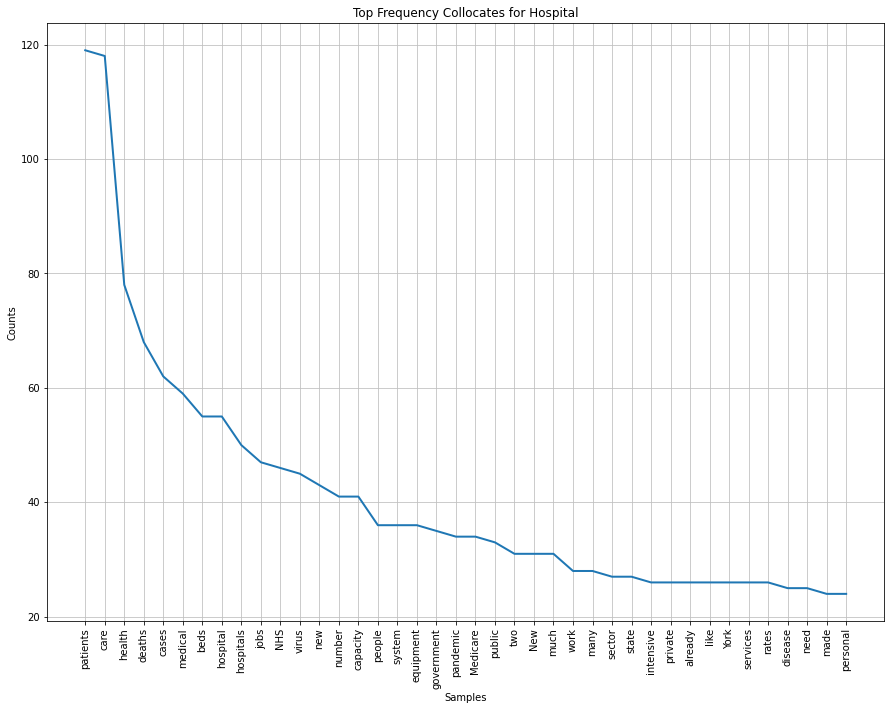

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 11))  # the size you want
tokenDist.plot(40, title="Top Frequency Collocates for " + word2find.capitalize())